<a href="https://colab.research.google.com/github/shcho11/00.Projects_KoreaUniv_2023-1/blob/main/202305_DM_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 워드클라우드(WorldCloud) 실습 
- 빅데이터마이닝 수업 크롤링 및 워드클라우드 실습 
- 2023.05

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np 
import os
import sys 

# colab 에서 chrome driver 사용하기. 
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [77.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:13 h

In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.5 MB/s eta 0:00:00


In [5]:
from konlpy.tag import Okt 
from wordcloud import WordCloud 
from PIL import Image 
import numpy as np

In [6]:
os.getcwd()

'/content'

In [8]:
!ls -a

.  ..  .config	drive  sample_data


In [10]:
f = open('drive/MyDrive/202301_DM/naver_moive_Hugh Jackman.txt', 'r')
text = f.readlines()
f.close()
text

['휴잭맨의. 매력이 한껏 돋보인 영화입니다.다른 출연자들도 너무 멋지구요.사람은 누구나 소중하며, 현재를 멋지게 사는게 중요하다는 메세지도 있구요.좋았습니다\n',
 '정말 인생 최고의 영화!!!! 너무 좋아서 울컥하고 남들 없었음 ㅠ 기립박수 칠뻔!! 강추!\n',
 '노래 진짜 쩐다 ㅠㅠㅠ 보는 내내 귀호강 ! 그리고 배우분들 연기 다 너무 좋아서 올해 마무리 영화로 딱인듯합니다\n',
 '시작한 지 얼마 안되어서부터 꿈을 얘기하는데 듣다보면 눈물이 난다. 그 꿈이 허황되기 때문일까 쉽게 꿈꿀 수 없는 그 꿈이 아름답기 때문일까. 생각보다 묵직한 음악으로의 시작이라 좋았고 처음 들어보는 잭 에프론의 목...\n',
 '좀 뻔한 전개 스토리이긴 하지만 아주 재밌게 봤고 감동적이었습니다. 실화 영화인 것을 생각하니 더욱 좋았습니다. 가족이나 아주 친한 사람들과 함께 보면 아주 좋을 영화입니다. 명대사들이 많이 나오고 기대 이상이었습니...\n',
 '라라랜드 보다 재밌다. 10만원이 넘는 비싼 뮤지컬 보다 1만원이 안되는 위대한 쇼맨이 한 수 위. 한해를 마무리하면서 세상을 살아가는데에는 역시 함께와 용기라는 생각을 다시 하게 해 주어서 좋았다. 연말에 가족들이...\n',
 '생각했던 거보다 기대 이상으로 재미있었고요 노래가 나올 때마다 온몸에 소름이 돋았습니다.\n',
 '진짜 재미있음 라라랜드보다 잼남\n',
 '인생영화 하나 또 나옴, 연말에 가족들끼리 한번 더 봐도 너무 좋을 듯 합니다 : )\n',
 '“This is me!” 당연하면서도 울컥한 한마디였다. 다른 사람들의 눈치 보느라 정작 나에 대해서는 몰랐고 그게 당연해졌었다. 그들의 외침에 스스로를 몰랐던 나에게 부끄러웠고 시원했고 당당해졌다\n',
 '휴잭맨 오프닝~ 대박!!!! 노래계속 따라불러요\n',
 '점왜 이영화 말이 없나 했더니 .. 이런 반전이 .. 졸라 재밌어\n',
 '화려한 쇼만 기대했다가 대반전 ㄷㄷ스토리도 끝까지 너무 좋구 ㅜ 메세지가 감동적이네여\n',
 '내생애최고영

In [12]:
okt = Okt()
noun_text = '' 
for sentence in text : 
  for noun in okt.nouns(sentence) : 
    noun_text += noun + ' '
noun_text

'휴잭맨 매력 영화 다른 출연자 사람 누구 현재 메세지 정말 인생 최고 영화 남 기립박수 뻔 강추 노래 진짜 쩐다 내내 호강 배우 연기 올해 마무리 영화로 시작 얼마 꿈 얘기 눈물 그 꿈 허황 때문 수 그 꿈 때문 생각 음악 시작 처음 잭 에프 론 목 좀 전개 스토리 아주 감동 실화 영화인 것 생각 더욱 가족 아주 사람 아주 영화 명대사 기대 이상 습 라라 랜드 뮤지컬 쇼맨 수 위 한해 마무리 세상 역시 용기 생각 다시 해 주어 연말 가족 생각 거 기대 이상 노래 때 온몸 소름 진짜 라라 랜드 잼남 인생 영화 하나 또 연말 가족 끼리 한번 더 듯 한마디 다른 사람 눈치 정작 나 대해 그게 그 외침 스스로 나 휴잭맨 오프닝 대박 노래 계속 점왜 이영화 말 반전 졸라 쇼 반전 스토리 끝 메세지 감동 여 생애 최고 영화 정말 뮤지컬영화 중 가장 상미 노래 균형 작품 생각 눈 귀가 잠시 동화 세계 기분 올해 최고 뮤지컬 영화 양옆 오열 가운데 혼자 잭 에프 론 감탄 봄 기대 온 노래 영상 볼 거리 칼라일 최근 다양성 대한 이슈 그것 대해 서도 생각 거리 생각 칼라일 동안 지고 이 영화 모두 초강추 주제 걸 성지고 휴잭맨 당신 엔터테이너 임명 휴잭맨 정말 빛 명도 캐릭터 자의 역할 보통 뮤지컬영화 관람 수록 곡 곡 정도 전체 발 일어나서 구 마치 공연장 느낌 모든 사람 자격 것 또 한번 깨 성장기 로맨스 가정 꿈 재능 희망 모든 요소 시간 느낌 또 전개도 노래 강 평이 이유 올해 가기 전 만난 최고 영화 연말 마음 영화 노래 정말 강추 암 왜 점 음악 스토리 감동 연말 보기 영화 임 연말 선물 영화 감동 영화 이 영화 꼭 극장 느낌 진짜진짜 돈 영화 진짜 꼭 완전 소름 영화 연말 영화 올해 진짜 이자 영화 신 도 도 강철 비도 바로 쇼맨 진짜 임나 오늘 또 임 쇼맨 음악 대박 간만 다시 보고 영화 다음 사운드 관 스토리 별로 기득권 층 미국 백인 남성 비장 애인 자신 출세 위해 장애인 이용 영화 임 오직 바 성공 뿐 나머지 단원 성공 관심 노래 영상 미로 장애인 사람 

In [13]:
# 코랩 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (46.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122947 files and dir

In [20]:
okt = Okt()
noun_text1 = ''
for sentence in text : 
  for noun in okt.nouns(sentence) : 
    if noun in ['데','이','그','것','건','전','사','배','등','중','못','수','저','더','번','안','요','함'] : 
      pass
    else : 
     noun_text1 += noun + ' '

print(noun_text1)

휴잭맨 매력 영화 다른 출연자 사람 누구 현재 메세지 정말 인생 최고 영화 남 기립박수 뻔 강추 노래 진짜 쩐다 내내 호강 배우 연기 올해 마무리 영화로 시작 얼마 꿈 얘기 눈물 꿈 허황 때문 꿈 때문 생각 음악 시작 처음 잭 에프 론 목 좀 전개 스토리 아주 감동 실화 영화인 생각 더욱 가족 아주 사람 아주 영화 명대사 기대 이상 습 라라 랜드 뮤지컬 쇼맨 위 한해 마무리 세상 역시 용기 생각 다시 해 주어 연말 가족 생각 거 기대 이상 노래 때 온몸 소름 진짜 라라 랜드 잼남 인생 영화 하나 또 연말 가족 끼리 한번 듯 한마디 다른 사람 눈치 정작 나 대해 그게 외침 스스로 나 휴잭맨 오프닝 대박 노래 계속 점왜 이영화 말 반전 졸라 쇼 반전 스토리 끝 메세지 감동 여 생애 최고 영화 정말 뮤지컬영화 가장 상미 노래 균형 작품 생각 눈 귀가 잠시 동화 세계 기분 올해 최고 뮤지컬 영화 양옆 오열 가운데 혼자 잭 에프 론 감탄 봄 기대 온 노래 영상 볼 거리 칼라일 최근 다양성 대한 이슈 그것 대해 서도 생각 거리 생각 칼라일 동안 지고 영화 모두 초강추 주제 걸 성지고 휴잭맨 당신 엔터테이너 임명 휴잭맨 정말 빛 명도 캐릭터 자의 역할 보통 뮤지컬영화 관람 수록 곡 곡 정도 전체 발 일어나서 구 마치 공연장 느낌 모든 사람 자격 또 한번 깨 성장기 로맨스 가정 꿈 재능 희망 모든 요소 시간 느낌 또 전개도 노래 강 평이 이유 올해 가기 만난 최고 영화 연말 마음 영화 노래 정말 강추 암 왜 점 음악 스토리 감동 연말 보기 영화 임 연말 선물 영화 감동 영화 영화 꼭 극장 느낌 진짜진짜 돈 영화 진짜 꼭 완전 소름 영화 연말 영화 올해 진짜 이자 영화 신 도 도 강철 비도 바로 쇼맨 진짜 임나 오늘 또 임 쇼맨 음악 대박 간만 다시 보고 영화 다음 사운드 관 스토리 별로 기득권 층 미국 백인 남성 비장 애인 자신 출세 위해 장애인 이용 영화 임 오직 바 성공 뿐 나머지 단원 성공 관심 노래 영상 미로 장애인 사람 대한 시 내 뮤지컬 영화 가장 최고 음악 음악

In [33]:
from PIL import Image 
mask_image = np.array(Image.open('drive/MyDrive/202301_DM/AppleMask.jpg'))

wc = WordCloud(background_color = 'black',
               font_path = 'drive/MyDrive/HMFMMUEX.TTC',
               max_words = 100,
               max_font_size = 100,
               min_font_size = 10,
               mask = mask_image,
               colormap = 'gist_ncar_r').generate(noun_text1) # colormap : https://www.kaggle.com/code/niteshhalai/wordcloud-colormap
wc.to_file('wc202305.png')

In [34]:
!ls -a

.  ..  .config	drive  sample_data  wc202305.png


### 마스크이미지가 white colored background를 갖는지 확인 (RGB 255,255,255)
- 만일, 마스크이미지의 np.array가 [255,255,255] 형태를 보이지 않는다면, 아래 링크에 설명된 코드로 transform 해줘야함.
- 그렇지 않으면, wordcloud결과가 mask image에 fit되지 않는 문제 발생할 수 있음.
- https://stackoverflow.com/questions/50435433/wordcloud-words-not-fitting-to-mask

In [35]:
print(mask_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


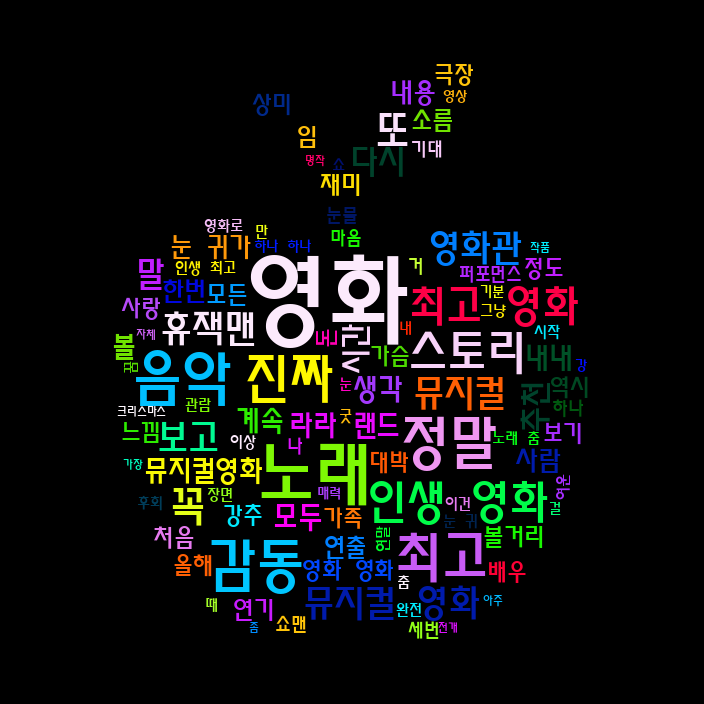

In [36]:
from IPython.display import Image
Image('wc202305.png')